# Analysing COVID-19 Data Repository by Johns Hopkins CSSE

In this project we'll work with data from the Johns Hopkins Center for Systems Sciences and Engineering on the COVID-19 (2019-nCoV) pandemic. We'll use three datasets containg time series of number of confirmed cases, deaths and recovered people. These datasets are updated daily by the Johns Hopkins CSSE and can be found [here](https://github.com/CSSEGISandData/COVID-19).

The Johns Hopkins CSSE also mantain an [interative map](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) with the cases around the world updated almost in real time. I strongly recomend you to use this map to keep yourself updated about the global situation. As this map already provides very useful information, we'll use this project only to plot some especific charts that will enable us to see the pandemic development around the world and especially in my country, Brazil.

This notebook is still in construction and the datasets are updated on a daily basis.

We'll begin by reading the datasets into DataFrames and displaying the first five rows of each DataFrame so you can see what the data looks like.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


In [2]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2,2,5,5,10,10,10,15,18,18
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,33,44,52,67,76,89,99,104,116,131
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,37,46,61,61,62,90,90,90,113
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,10,10,10,10,16,21,26,31,39
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,1,1,1,2,2,2,2


We'll now drop the latitude and longitude columns.

In [4]:
# Droping the columns on the confirmed dataframe
print('Before:')
print(confirmed.shape)
confirmed = confirmed.drop(['Lat', 'Long'], axis=1)
print('After:')
print(confirmed.shape)
print('\n')

# Droping the columns on the deaths dataframe
print('Before:')
print(deaths.shape)
deaths = deaths.drop(['Lat', 'Long'], axis=1)
print('After:')
print(deaths.shape)
print('\n')

# Droping the columns on the recovered dataframe
print('Before:')
print(recovered.shape)
recovered = recovered.drop(['Lat', 'Long'], axis=1)
print('After:')
print(recovered.shape)

Before:
(263, 81)
After:
(263, 79)


Before:
(263, 81)
After:
(263, 79)


Before:
(249, 81)
After:
(249, 79)


Now we'll set up some colors that we'll use to plot the charts.

In [5]:
dark_blue = (0/255,107/255,164/255)
orange = (255/255, 128/255, 14/255)
green = (44/255, 160/255, 44/255)
red = (214/255, 39/255, 40/255)
yellow = (188/255, 189/255, 34/255)

We'll now write two functions:

* The `total_per_day()`  drops the 'Country/Region' and 'Province/State' columns and then sums all the values in the same column. Notice that as the columns were dropped, each column left represent a date.

* The `column_to_day()` changes the name of each column from a date to the following pattern: 'Day 1, Day 2, Day 3...'

Both functions returns a Series.

In [6]:
def total_per_day(df):
    
    # Dropping the columns
    df = df.drop(['Country/Region', 'Province/State'], axis=1)
    df_len = df.shape[1]
    
    # Summing the columns
    total_dict = {}
    for col in df.columns:
        total_dict[col] = df[col].sum()
    
    # Transforming into Series
    total = pd.Series(total_dict)
    
    return total

def column_to_day(serie_date):
    
    dict_day = {}
    for i in range(1, len(serie_date)+1):
        dict_day['Day {}'.format(i)] = serie_date[i-1]
        
    serie_day = pd.Series(dict_day)
    return serie_day

Let's use the `total_per_day()` function to create Series of the total of confirmed cases, deaths and recovered in the world.

In [8]:
total_confirmed = total_per_day(confirmed)
total_deaths = total_per_day(deaths)
total_recovered = total_per_day(recovered)

And now let's plot these Series.

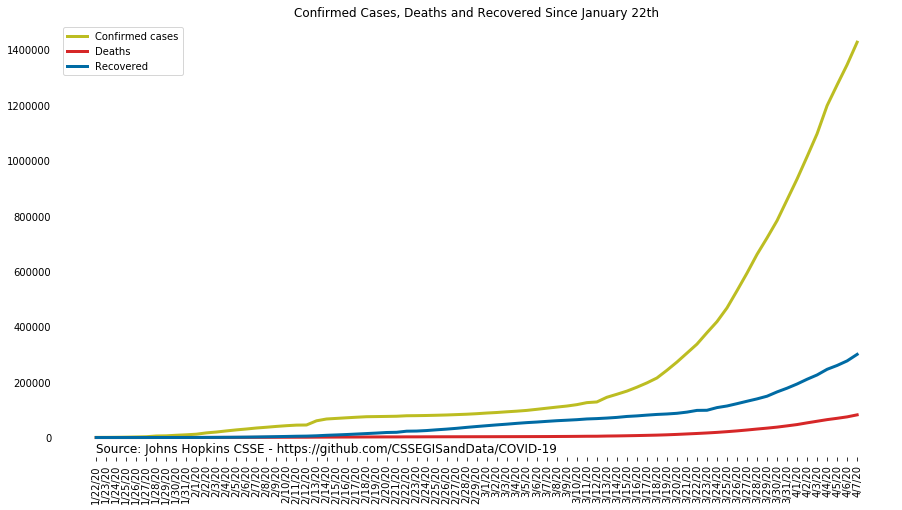

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(total_confirmed, c=yellow, label='Confirmed cases', linewidth=3)
ax.plot(total_deaths, c=red, label='Deaths', linewidth=3)
ax.plot(total_recovered, c=dark_blue, label='Recovered', linewidth=3)
ax.set_title('Confirmed Cases, Deaths and Recovered Since January 22th')
ax.tick_params(bottom=True, top=False, left=False, right=False)
ax.text(0, -54000, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.savefig('world.jpg')
plt.show()

We'll use both of these functions to create Series of the total of confirmed cases, deaths and recovered in the US and China. That's necessary because the datasets contain one row for each State/Province in these countries.

Notice that we'll first use the `total_per_day()` function to sum the number of cases in each day and the the `column_to_day()` function to rename the columns. 

In [9]:
us_c = column_to_day(total_per_day(confirmed[confirmed['Country/Region'] ==  'US']))
china_c = column_to_day(total_per_day(confirmed[confirmed['Country/Region'] ==  'China']))

us_d = column_to_day(total_per_day(deaths[deaths['Country/Region'] ==  'US']))
china_d = column_to_day(total_per_day(deaths[deaths['Country/Region'] ==  'China']))

us_r = column_to_day(total_per_day(recovered[recovered['Country/Region'] ==  'US']))
china_r = column_to_day(total_per_day(recovered[recovered['Country/Region'] ==  'China']))

The US and China differ from the other countries in the dataset beacause, as mentioned, there's a row for each of their State/Province, and because, as this data started to be published by the Johns Hopkins CSSE on January 22th there are no days with zero cases for these countries.

Thus, for the rest of the countries we'll use a new function that:
    
* Also drops the 'Country/Region' and 'Province/State' columns;
* Iterate over each column in the country's row and drop all columns before the first case, for that it:
    * Changes the value 0 to `np.nan`;
    * Uses the `dropna()` method to drop the columns.
* Changes the name of each column from a date to the following pattern: 'Day 1, Day 2, Day 3...'
* Store the data into a dictionary;
* Convert the dictionary into Series.

In [10]:
def country_to_series(country_row):
    
    # Dropping the columns
    country_row = country_row.drop(['Country/Region', 'Province/State'], axis=1)
    country_row_len = country_row.shape[1]
    
    # Changing the values from 0 do np.nan
    for i in range(country_row_len):
        value = country_row.iloc[0, i]
        if value == 0:
            country_row.iloc[0, i] = np.nan
        else:
            break
    
    # Dropping columns with null value        
    country_row = country_row.dropna(axis=1)
    
    # Changing the column name
    country_row_new_len = country_row.shape[1]
    columns_by_days = []
    for i in range(1, country_row_new_len + 1):
        columns_by_days.append('Day {}'.format(i))
    country_row.columns = columns_by_days

    # Storing the data into a dictionary
    country_dict = {}
    for i in range(0, len(columns_by_days)):
        country_dict[columns_by_days[i]] = country_row.iloc[0, i]

    # Converting to Series
    country_series = pd.Series(country_dict)
    
    return country_series

We'll use this function to create a Series of the total of confirmed cases for each of the following countries:

* Brazil
* Italy
* Iran
* Japan
* South Korea
* Spain
* France
* Germany
* United Kingdom
* Portugal
* Netherlands

In [11]:
# Confirmed case
br_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Brazil'])
it_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Italy'])
ir_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Iran'])
jp_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Japan'])
sk_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Korea, South'])
sp_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Spain'])
fr_c = country_to_series(confirmed[confirmed['Province/State'] == 'France'])
ge_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Germany'])
uk_c = country_to_series(confirmed[confirmed['Province/State'] == 'United Kingdom'])
pt_c = country_to_series(confirmed[confirmed['Country/Region'] == 'Portugal'])
ne_c = country_to_series(confirmed[confirmed['Province/State'] == 'Netherlands'])

We'll create two lists that we'll be used to plot the charts:

* The first list contains the Series we just created;
* The second one contains the name of the countries.

In [12]:
countries_c = [it_c, us_c, jp_c, sk_c, sp_c, fr_c, ge_c, uk_c, pt_c, ne_c, ir_c, china_c]
countries_names = ['Italy', 'USA', 'Japan', 'South Korea', 'Spain', 'France', 'Germany', 'UK', 'Portugal', 'Holanda', 'Iran', 'China']

As we'll plot lots of charts in the same figure and each country's Series has a diffenrent lenght, we need to write a function that will determine the lenght of the x-axis for each country.

The `days()` function:

* Stores the number of days for since the first case for the country in the variable `n_days`;
* Stores the integer of the division of `n_days` by five in the variable `num_int`;
* Uses a `for` to append each number from one to `num_int` times 5 in the `int_days` list;
* Returns a list containing only the days which the day's number is divisible by 5 in the following format: 'Day 5, Day 10 , Day 15...'


In [13]:
def days(c):
    
    # Storing number of days
    n_days = len(c)
    
    # Storing the integer of the division by five
    num_int = int(n_days/5)
    
    int_days = []
    for n in range(num_int):
        num_of_the_day = 5 * (n+1)
        int_days.append(num_of_the_day)
    
    days = []
    for n in int_days:
        days.append('Day {}'.format(n))
        
    return days

Now we'll plot several charts comparing the number of confirmed cases in Brazil since its first confirmed case with the other countries within the same number of days since their first confirmed cases.

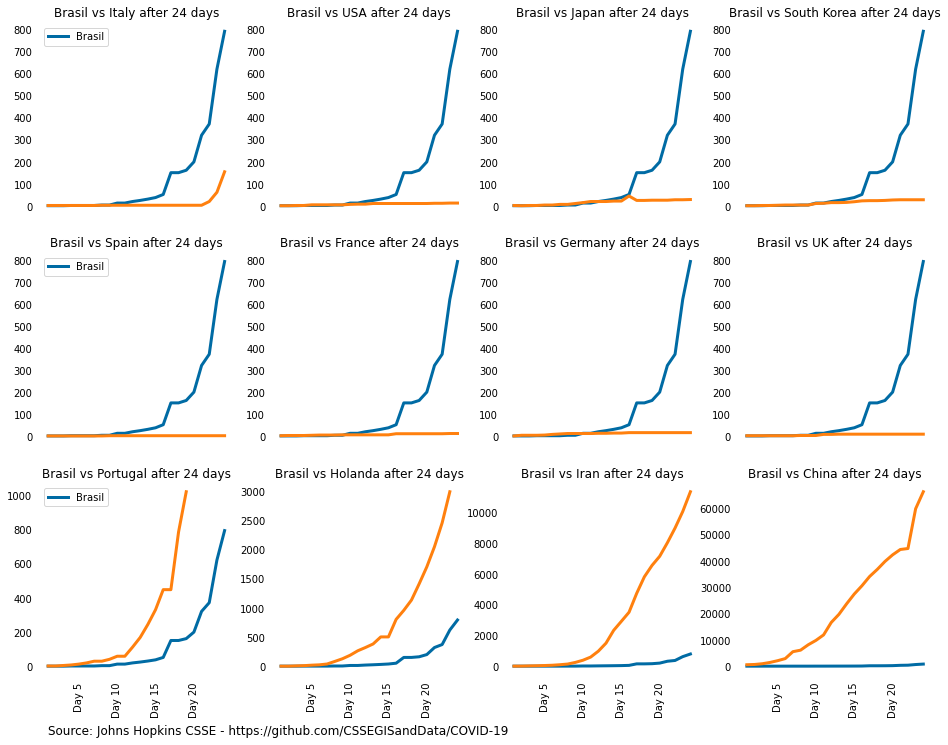

In [14]:
lenght = len(br_c)
fig = plt.figure(figsize=(16,12))

for i in range (0,12):
    ax = fig.add_subplot(3,4,i+1)
    ax.plot(br_c, c=dark_blue, label='Brasil', linewidth=3)
    ax.plot(countries_c[i][0:lenght], c=orange, linewidth=3)
    ax.tick_params(which='both', bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_xticks(days(br_c))
    ax.set_title('Brasil vs {} after {} days'.format(countries_names[i], lenght))
    plt.xticks(rotation=90)
    
    if i > 7:
        ax.tick_params(labelbottom=True)
        plt.xticks(rotation=90)
        
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    
    if i == 8:
        ax.text(0, -400, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

    if i == 0 or i == 4 or i==8:
        plt.legend(loc='upper left')
        
plt.savefig('brvs12.jpg')
plt.show()


We'll now plot each country's confirmed cases within the same y-axis scales. This will allow us to compare the number of cases in each country.

We'll not plot Brazil's chart in this figure or in the next one because we've seen enough Brazil in the figure above.

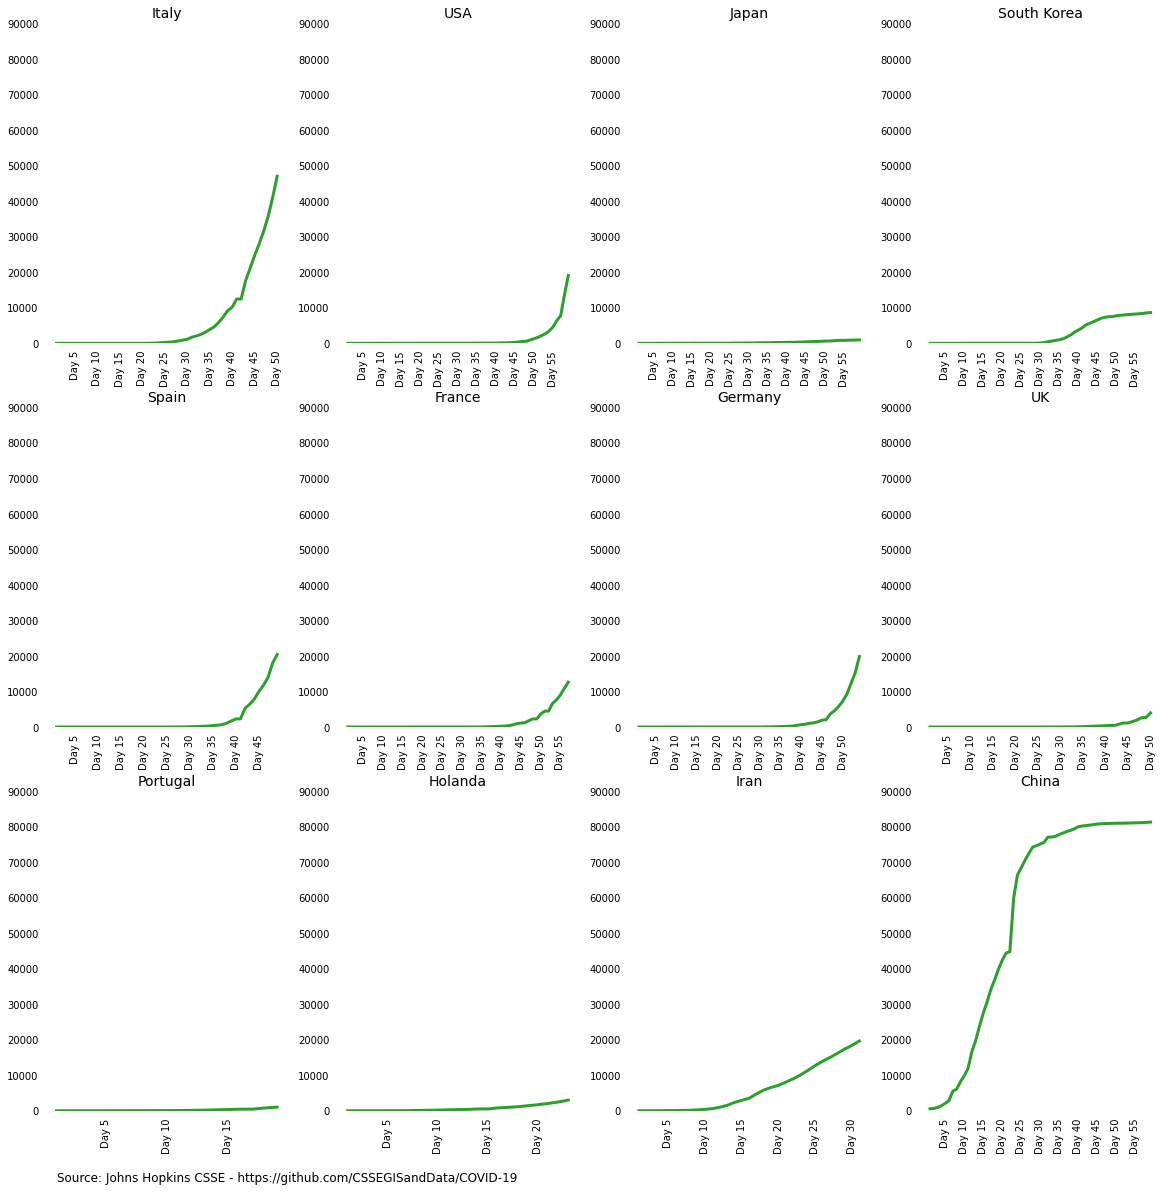

In [15]:
fig = plt.figure(figsize=(20,20))

for i in range(0,12):
    ax = fig.add_subplot(3,4, i + 1)
    ax.plot(countries_c[i], c=green, linewidth=3)
    ax.set_title(countries_names[i], fontsize=14)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticks(days(countries_c[i]))
    ax.set_ylim(0, 90000)
    
    if i == 8:
        ax.text(0, -20000, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12,horizontalalignment='left' )
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    plt.xticks(rotation=90)
    
plt.savefig('g12.jpg')
plt.show()


Now let's zoom-in in each country's chart to see the current behavior of its confirmed cases curve.

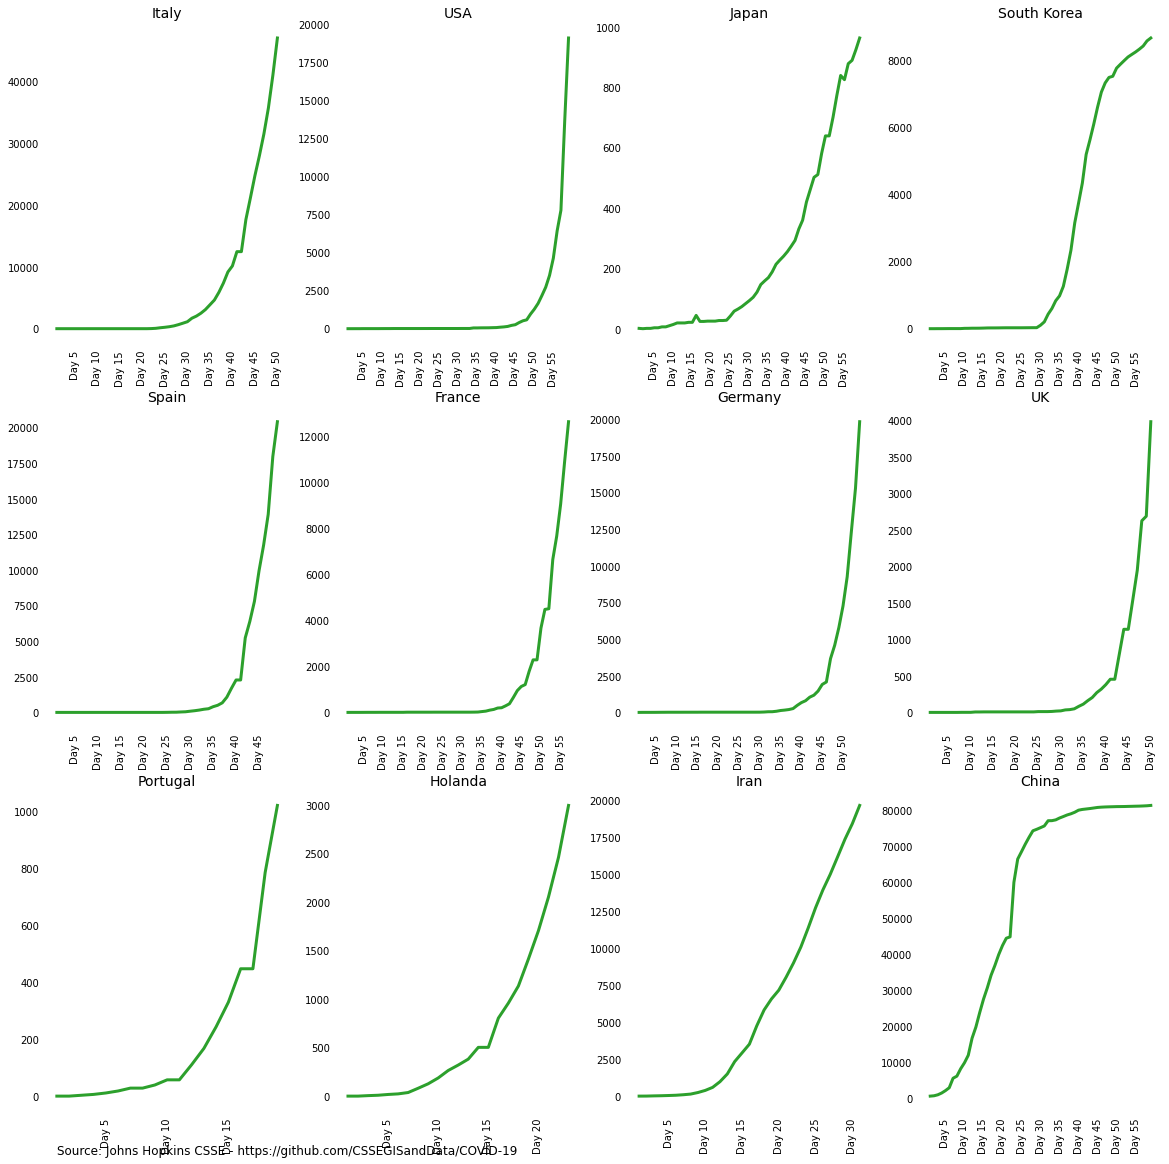

In [16]:
fig = plt.figure(figsize=(20,20))       

for i in range(0,12):
    ax = fig.add_subplot(3,4, i + 1)
    ax.plot(countries_c[i], c=green, linewidth=3)
    ax.set_title(countries_names[i], fontsize=14)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticks(days(countries_c[i]))
    
    if i == 8:
        ax.text(0, -200, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12,horizontalalignment='left' )
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    plt.xticks(rotation=90)
    
plt.savefig('g12z.jpg')
plt.show()


This project is still in construction. In the next steps we'll work with the numbers of deaths, recovered and active cases.

As mentioned, the data is updated on a daily bases.